<a href="https://colab.research.google.com/github/elenagiraldo3/PCompetitiva/blob/master/Tutorial_tf_2_3_2020_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerías**

In [1]:
import tensorflow as tf
import numpy as np
from __future__ import absolute_import, division, print_function
import time
import datetime

#Capas redes
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

#Tensorboard
from tensorboard import notebook

#Carga datos
import pandas as pd
import numpy as np
import os 
#Hacer que los valores de numpy sean más fáciles de leer

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Graficos
import matplotlib.pyplot as plt

np.set_printoptions(precision=3,suppress=True)

**Comprobación versiones y dispositivos**

In [2]:
print(tf.__version__)
print(tf.executing_eagerly())
print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))


2.7.0
True
Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Tensores y Operaciones**

In [8]:
#constante
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.)
print(a)
print(b)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [9]:
#sumar
print(a+b)

tf.Tensor(7.0, shape=(), dtype=float32)


In [13]:
#definir array
x1 = tf.constant([1,2,3,4])
x11 = tf.constant([4,5,6,7])
x2 = tf.constant([[1,2,3,4],[4,6,7,8]])
x3 = tf.constant([[1,2],[3,4],[5,6]])
print(x1)
print(x2)
print(x3)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(
[[1 2 3 4]
 [4 6 7 8]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [11]:
#rango y dimensiones
print(tf.shape(x1))
print(tf.rank(x1))


tf.Tensor([4], shape=(1,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [17]:
# Multiplicación de constantes
print(tf.multiply(a,b))
print(tf.multiply(x1,x11))
print(tf.add(x1,x11))
#multiplicacion de matrices
x4 = tf.constant([[4,9],[4,5]])
x5 = tf.constant([[3],[4]])
print(tf.matmul(x4,x5))

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor([ 4 10 18 28], shape=(4,), dtype=int32)
tf.Tensor([ 5  7  9 11], shape=(4,), dtype=int32)
tf.Tensor(
[[48]
 [32]], shape=(2, 1), dtype=int32)


In [21]:
#elevar al cuadrado
print(tf.square(x1))
#raiz cuadrada
x1 = tf.constant([1,2,3,4], dtype=tf.float32)
print(tf.sqrt(x1))
#tipo mse
print(tf.sqrt(tf.square(x1)+tf.square(x1)))

tf.Tensor([ 1.  4.  9. 16.], shape=(4,), dtype=float32)
tf.Tensor([1.    1.414 1.732 2.   ], shape=(4,), dtype=float32)
tf.Tensor([1.414 2.828 4.243 5.657], shape=(4,), dtype=float32)


In [22]:
#suma de los elementos de un vector
print(tf.reduce_sum(x1))

tf.Tensor(10.0, shape=(), dtype=float32)


In [26]:
# identidad
print(tf.eye(2,2))
# ceros
print(tf.zeros(2))
# aleatorio
print(tf.random.uniform([3,3]))

tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
tf.Tensor(
[[0.723 0.29  0.766]
 [0.093 0.457 0.977]
 [0.555 0.244 0.992]], shape=(3, 3), dtype=float32)


In [29]:
#funciones de perdida
print(tf.sigmoid(x1)) #sigmoide
print(tf.tanh(x1)) #tangente hiperbólica
print(tf.nn.softmax(x1)) #softmax (usar librería redes neuronales (nn))
print(tf.argmax(tf.nn.softmax(x1))) #posición donde está el máximo


tf.Tensor([0.731 0.881 0.953 0.982], shape=(4,), dtype=float32)
tf.Tensor([0.762 0.964 0.995 0.999], shape=(4,), dtype=float32)
tf.Tensor([0.032 0.087 0.237 0.644], shape=(4,), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)


**Variables**

In [36]:
#placeholder #get_variable -> tf1 (no!!!)
v = tf.Variable(tf.zeros([1,2,3]))
v1 = tf.Variable(0.0)
print(v)
print(v1)
print(v+1)
v1.assign_add(1)
v.read_value()

<tf.Variable 'Variable:0' shape=(1, 2, 3) dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [38]:
my_var_list = [tf.Variable(x) for x in range(10)]
print(my_var_list)

[<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=4>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=8>, <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=9>]


**Elección dispositivo**

In [51]:
import time
print(x1.device.endswith('GPU:0'))

with tf.device('CPU:0'):
  start=time.time()
  A=tf.constant(([3,2],[4,4]))
  A*2
  print(A.device.endswith('GPU:0'))
  print(A.device.endswith('CPU:0'))
  end = time.time()
  print(end-start)


True
False
True
0.004370927810668945


# **Tratamiento de datos**

**Carga de datos**

In [52]:
#Datos en keras
mnist = tf.keras.datasets.mnist

In [53]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [55]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [61]:
#Datos en repositorio web

abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

In [62]:
#Ver primeros datos
abalone_train.head()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [63]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')
print(abalone_features.head())
print(abalone_labels.head())

   Length  Diameter  Height  ...  Shucked weight  Viscera weight  Shell weight
0   0.435     0.335   0.110  ...          0.1355          0.0775        0.0965
1   0.585     0.450   0.125  ...          0.3545          0.2075        0.2250
2   0.655     0.510   0.160  ...          0.3960          0.2825        0.3700
3   0.545     0.425   0.125  ...          0.2940          0.1495        0.2600
4   0.545     0.420   0.130  ...          0.3740          0.1695        0.2300

[5 rows x 7 columns]
0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64


In [64]:
#Cargar imágenes

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [66]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
roses = list(data_dir.glob('roses/*'))
len(roses)

3670


641

In [70]:
#Crear conjunto de datos y etiquetas de entrenamiento
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               image_size=(180,180),
                                                               batch_size=16)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2,
                                                               subset="validation",
                                                               seed=123,
                                                               image_size=(180,180),
                                                               batch_size=16)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


**Crear conjunto de entrenamiento y validación**

In [ ]:
# Crear conjunto de datos y etiquetas de entrenamiento
train_ds

In [73]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


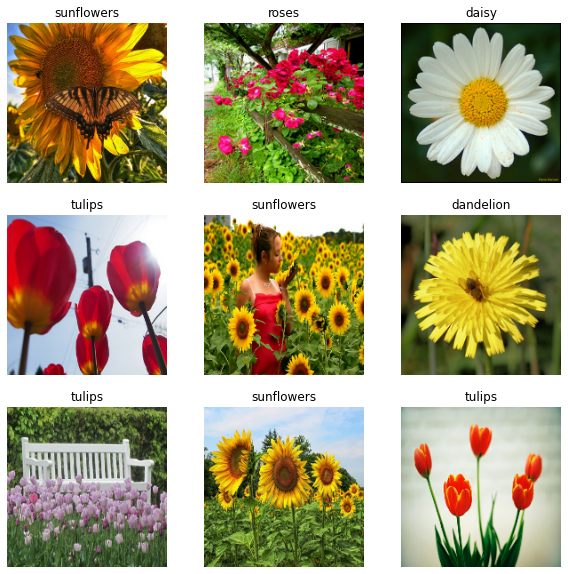

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Normalizacion de datos**

Opción 1

In [75]:

#Reescalar
x_train,y_train=x_train/255.0,x_test/255.0

In [76]:
#Pasar etiquetas a vectores dummy

def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    

    return encoded


In [77]:

#Normalizacion estandar
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train=(x_train-mean)/std
x_test=(x_test-mean)/std




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Opción 2

In [78]:
#Reescalado
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#Se aplicando sobre el conjunto con la función map

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Los valores están ahora entre 0 y 1.

print(np.min(first_image), np.max(first_image))


#O se aplica sobre el modelo


0.0 0.96902645


In [ ]:
#Normalizacion




# **Aumento de datos**

In [85]:
import tensorflow_datasets as tfds
(train_ds, val_ds, test_ds),metadata=tfds.load(
    'tf_flowers',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True
)



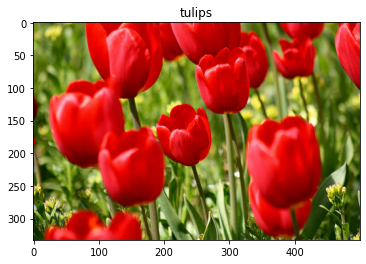

In [87]:
#Ejemplo.Imagen original

get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [89]:
#Normalizacion
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(180,180),
    layers.experimental.preprocessing.Rescaling(1./255)
])
result=resize_rescale(image)

In [91]:
#Aumentada
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                       layers.experimental.preprocessing.RandomRotation(0.2)
                                       ])

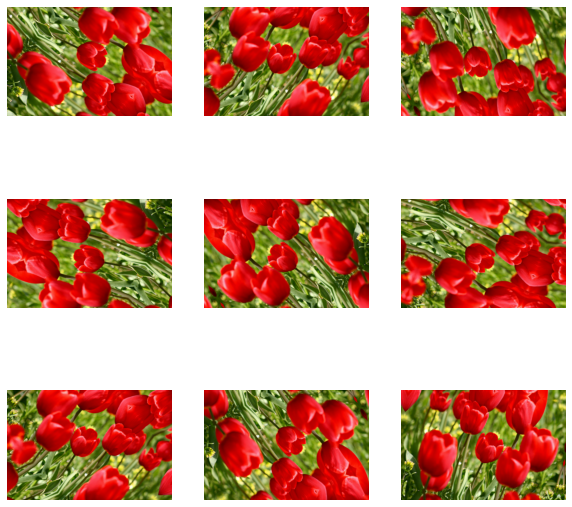

In [92]:
#Aumentado


# Add the image to a batch
image = tf.expand_dims(image, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

# **Modelo básico con Keras**

**Entrenamiento**

In [93]:
#Definir funcion para que normalice en el entrenamiento
normalize = preprocessing.Normalization()

In [100]:
#Modelo 1
norm_abalone_model=tf.keras.Sequential([
                                        normalize,
                                        layers.Dense(64),
                                        layers.Dense(1)
])
norm_abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                           optimizer=tf.optimizers.Adam())
norm_abalone_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 62.0262
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 12.0413
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 8.7085
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.1898
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.7348
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.3426
Epoch 7/10
104/104 [==============================] - 0s 3ms/step - loss: 7.0328
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 6.8179
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 6.6688
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 6.5529


In [102]:
#Modelo 2. Con Tensorboaard
%load_ext tensorboard

fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train[...,tf.newaxis]
x_test=x_test[...,tf.newaxis]
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(1000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)
test_ds.map(lambda x,y: (resize_rescale(x),y))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
4431872/4422102 [==============================] - 0s 0us/step


<MapDataset shapes: ((180, 180, 28), (None,)), types: (tf.float32, tf.uint8)>

In [111]:
def create_model():
  return tf.keras.Sequential([
              
                
                              layers.Conv2D(16,2,padding='same',activation='relu'),
                              layers.MaxPooling2D(),
                              layers.Flatten(),
                              layers.Dense(10,activation='softmax')
  ])
  

In [117]:
from time import strftime
def train_model():
  model = create_model()
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  logdir=os.path.join("logs",str(datetime.datetime.now()),strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  history=model.fit(x=x_train,y=y_train,epochs=3,callbacks=[tensorboard_callbacks])
  model.summary()
  return [model,history]

In [118]:
[model,history]=train_model()
%tensorboard --logdir logs

  

Epoch 1/3


TypeError: ignored

**Evaluación**

**Predicciones**

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)



**Guardar y restaurar modelo**

In [ ]:
import keras
# Guardar el Modelo
model.save('path_to_my_model.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('path_to_my_model.h5')

# **Modelo con Tensorflow**

**GradientTape**

In [ ]:
import tensorflow as tf
with tf.GradientTape(persistent=True) as tape:
  trainable = tf.Variable(1.)
  non_trainable = tf.Variable(2., trainable=False)
  x1=trainable*2
  x2=non_trainable*3
tape.gradient(x1,trainable)
assert tape.gradient(x2,non_trainable) is None

**tf.function**

In [ ]:
#Ejecución eagler



In [ ]:
#Ejecución grafo


In [ ]:
#Comparacion
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# warm up
conv_layer(image); conv_fn(image)

print("Eager conv:", timeit.timeit(lambda: conv_layer(image), number=10))
print("Function conv:", timeit.timeit(lambda: conv_fn(image), number=10))
print("Note how there's not much difference in performance for convolutions")

In [ ]:
#For Tensor arguments, tf.function instantiates a separate graph for every unique set of input shapes and datatypes. 
#The example below creates two separate graphs, each specialized to a different shape:
@tf.function
def f(x):
  return x + 1
vector = tf.constant([1.0, 1.0])
matrix = tf.constant([[3.0]])
f.get_concrete_function(vector) is f.get_concrete_function(matrix)

In [ ]:
#Indicar los tipos de datos de entrada
@tf.function(
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])
def f(x):
  return x + 1
vector = tf.constant([1.0, 1.0])
matrix = tf.constant([[3.0]])
f.get_concrete_function(vector) is f.get_concrete_function(matrix)


In [ ]:
#Crea variables cuando se compila la función
class MyModule(tf.Module):
  def __init__(self):
    self.v = None

  @tf.function
  def __call__(self, x):
    if self.v is None:
      self.v = tf.Variable(tf.ones_like(x))
    return self.v * x

**Tratamiento datos**

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Agrega una dimension de canales
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
#Utiliza tf.data to separar por lotes y mezclar el conjunto de datos:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

**Definición Grafo**

Capas neuronales

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)



In [ ]:
eager_model=MyModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(images), number=100))
print("Graph time:", timeit.timeit(lambda: graph_model(images), number=100))

Parámetros optimización

In [ ]:
# Crea una instancia del modelo
model = MyModel()

#Escoge un optimizador y una funcion de perdida para el entrenamiento de tu modelo:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

#Escoge metricas para medir la perdida y exactitud del modelo. 
#Estas metricas acumulan los valores cada epoch y despues imprimen el resultado total.

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

** Funciones de Entrenamiento y evaluación **

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

**Entrenamiento**

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100.,
                        test_loss.result(),
                        test_accuracy.result()*100.))

  # Reinicia las metricas para el siguiente epoch.
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

**Predicción**

In [ ]:
#Hacer predicciones




**Análisis Resultados**

In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test[:,:,:,0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**Tensorboard**

In [ ]:
notebook.list() # View open TensorBoard instances

In [ ]:
#!kill

In [ ]:

# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used

notebook.display(port=8008, height=1000)

In [ ]:

# The function to be traced.
@tf.function
def my_func(x, y):
  # A simple hand-rolled layer.
  return tf.nn.relu(tf.matmul(x, y))

# Set up logging.
stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/muva%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# Sample data for your function.
x = tf.random.uniform((3, 3))
y = tf.random.uniform((3, 3))

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=True)
# Call only one tf.function when tracing.
z = my_func(x, y)
with writer.as_default():
  tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)
  
%tensorboard --logdir logs/muva --port=8008

**Guardar**

In [ ]:
module_no_signatures_path = os.path.join('temp/', 'pp')

tf.saved_model.save(model, module_no_signatures_path)

**Restaurar**

In [ ]:
imported = tf.saved_model.load(module_no_signatures_path)
